<a href="https://colab.research.google.com/github/samiesaheb/Deep-Learning/blob/main/MNIST%20explained.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Loading the MNIST dataset from the Python library Keras, the MNIST dataset consists of grayscale images of handwritten digits and their respective labels (from 0 to 9). The MNIST dataset is famous for beginners learning about Deep Learning. 


In [178]:
from keras.datasets import mnist
(train_images, train_labels),(test_images, test_labels) = mnist.load_data()

Running the code below prints the shape of the training images (60000,28,28) -> 60000 indicating the number of training images and the 28's after indicating the size of the images (28x28 pixels).

In [179]:
train_images.shape

(60000, 28, 28)

Verifying there the number of training labels and training images are the same

In [180]:
train_labels.shape

(60000,)

Doing the same as above with the testing images and labels now

In [181]:
test_images.shape

(10000, 28, 28)

In [182]:
test_labels.shape

(10000,)

We can check to see whether the labels corresponding to the train images are correct, indexing starts from 0, we will check what number the 1st image shows

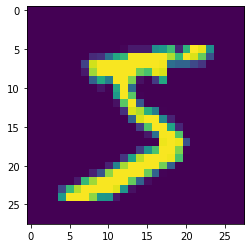

In [183]:
import matplotlib.pyplot as plt

plt.imshow(train_images[0])
plt.show()

As you can see the first training image is an image of the digit 5, lets see if the first label in the training labels corresponds to this

In [184]:
train_labels[0]

5

Okay so we can be sure that the training images and their corresponding labels are correct, to make sure of this, try out checking other indexes of images and labels to see if they are correct

Now, we have to scale the images pixel values to be between 0 and 1. This is done by dividing each pixels values by 255 (the current images pixel values range between 0 and 255 currently, dividing by the max pixel value will allow us to shrink the values to be between [0,1]. We also have to convert the datatype of the array of pixels to float32 as it will enable us to store more contents in memory. 

We also will need to reshape the images to be (# of samples in dataset, pixel_size x pixel_size). For example for the training set we reshape it to be (60000, 28x28) = (60000, 784). 

We can do both of this using the 'reshape_and_normalize' function defined below.

In [185]:
def reshape_and_normalize(image):
  image = image.reshape((image.shape[0],28*28))
  image = image.astype('float32') / 255.
  return image

We apply the 'reshape_and_normalize' function on the training images and testing images.

In [186]:
train_images = reshape_and_normalize(train_images)

In [187]:
test_images = reshape_and_normalize(test_images)

The preprocessing stage is over, now we can build the neural network architecture. We have to import the [TensorFlow](https://en.wikipedia.org/wiki/TensorFlow) library in order to do this. Tensorflow is a free and open source library used for Machine Learning and Artificial Intelligence, developed by Google.

In [188]:
from tensorflow.keras import models
from tensorflow.keras import layers

We create the neural network  by creating the Sequential class used from the TensorFlow library. In to this Sequential class we have to add layers, the layers are combined in "sequential" order to create the network. Here we create a simple network consisting of only 2 layers. A layer takes as input a matrix and outputs one or more matrices. 

For simple matrices like the images we are dealing with, we use a Dense layer (also called a fully connected layer), the first Dense layer taking as input a matrix where the first dimension is 784 (28x28). This layer will return a matrix whose first dimension is changed to 512.

The second Dense layer takes this matrix from the first layer and changes its dimensions such that the outputs first dimension is 10. 

In [189]:
network = models.Sequential()

network.add(layers.Dense(512, activation='relu', input_shape=(28*28,)))
network.add(layers.Dense(10, activation='softmax'))

In [190]:
network.compile(optimizer='rmsprop',loss='categorical_crossentropy',metrics=['accuracy'])

Before we can train the model on the dataset, we have to convert the labels into a matrix of shape (10,1), where all the of the entries of the matrix are zeros apart from the index corresponding to to the label, with an entry of 1, e.g.

If the class_label is 5, this gets converted to a matrix of shape (10,1):
-> 
[0,0,0,0,0,1,0,0,0]
The 5th index (indexing starts from 0) is set to 1, indicating that label corresponds to class 5 -> image which has the digit 5.


In [191]:
from tensorflow.keras.utils import to_categorical

train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)

We can now start training the model on the training images and training labels using 'network.fit' which takes in the train images, train labels, epochs (indicating how many times you want the model to pass the the entire dataset), and the batch size (indicating how many samples of the dataset you want to process before the model is updated (its weights) in such a way as to improve training.)

In [192]:
network.fit(train_images, train_labels, epochs=5, batch_size=128)

Epoch 1/5
469/469 [==============================] - 7s 14ms/step - loss: 0.2556 - accuracy: 0.9265
Epoch 2/5
469/469 [==============================] - 5s 11ms/step - loss: 0.1030 - accuracy: 0.9697
Epoch 3/5
469/469 [==============================] - 5s 11ms/step - loss: 0.0678 - accuracy: 0.9793
Epoch 4/5
469/469 [==============================] - 5s 11ms/step - loss: 0.0499 - accuracy: 0.9851
Epoch 5/5
469/469 [==============================] - 6s 12ms/step - loss: 0.0369 - accuracy: 0.9891


The model is trained, as you can see the model after 5 epochs has improved such that it tends to be be accurate about 98.8% of the time at predicting the label of the image. We can now test to see how well this model does on the testing set.

In [198]:
(loss, acc) = network.evaluate(test_images, test_labels)

313/313 [==============================] - 1s 4ms/step - loss: 0.0681 - accuracy: 0.9799


In [199]:
acc

0.9799000024795532

As you can see, the model is accurate 97.99 ~ 98% of the time, this is a decrease from the models performance on the training set but still highly accurate as classifying digits it has not seen before. We can check out one sample to see if it truly is this accurate. We will check what label the model predicts for the first testing image (0th index).

In [160]:
check_image = test_images[0].reshape(28,28)

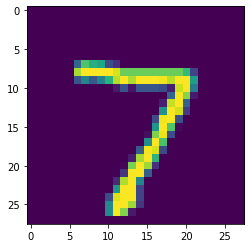

In [161]:
plt.imshow(check_image)
plt.show()

In [175]:
test_labels[0]

array([0., 0., 0., 0., 0., 0., 0., 1., 0., 0.], dtype=float32)

As the test_labels were converted to a matrix earlier, we can use a function called np.argmax imported from the NumPy library to find the index with the greatest value in the matrix, corresponding to what class that image is.

In [172]:
import numpy as np
np.argmax(test_labels[0])

7

The label does correspond to what the testing image is, we now compare the actual truth (the testing label) with the label that the model predicts when feeding this test image.

In [202]:
predict_test0 = network.predict(test_images[0].reshape(1,28*28))
predict_test0

array([[1.7215118e-10, 6.5750530e-11, 9.0090658e-08, 4.7797307e-06,
        7.6368782e-14, 4.2867399e-09, 1.6655525e-16, 9.9999511e-01,
        1.8644941e-09, 1.3250711e-08]], dtype=float32)

Using the argmax function

In [203]:
np.argmax(predict0)

7

Hooray, we the models prediction for the first image in the testing set was same as the actual label for that image, we can see evidence that the model is indeed highly accurate at predicting the label of an image. Try testing this out on more images.